In [286]:
# Imports
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import folium
import json
import re
from collections import Counter

# new imports for model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
 

Read file for Arnesh

In [287]:
# listings_filepath = '/Users/arneshsaha/Desktop/AirBnb/datasets/listings.csv'
# listings_df = pd.read_csv(listings_filepath)

Read file for Abhay

In [288]:
listings_filepath = '/Users/abhayrakeshdeshmukhmaurya/Library/CloudStorage/OneDrive-UniversityofEdinburgh/CS/University/Year 2/Data Science/CW3/AirBnb/datasets/listings.csv'
listings_df = pd.read_csv(listings_filepath)

Data Cleaning

In [289]:
# Deleting Unnecessary Columns
columns = ['host_url', 'host_name', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'calendar_updated', 'calendar_last_scraped','picture_url', 'neighbourhood_group_cleansed','license', 'host_location', 'first_review', 'last_review', 'host_thumbnail_url', 'host_picture_url' ]
listings_df.drop(columns=columns, inplace=True)

# Converting columns with (True, False) to (1, 0)
replace_dict = {'instant_bookable':{'t':1, 'f':0}, 
                'host_identity_verified':{'t':1, 'f':0},
                'host_has_profile_pic':{'t':1, 'f':0},
                'host_is_superhost':{'t':1, 'f':0},
                'has_availability':{'t':1, 'f':0}
                }
listings_df = listings_df.replace(replace_dict)

# Removing HTML tags from description
def remove_html_tags(text):
    if pd.isna(text):
        return text
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

listings_df['description'] = listings_df['description'].apply(remove_html_tags)

# Creating parking column and assigning the rows with parking feature
parking_rows = listings_df[(listings_df['name'].str.contains('parking', case=False)) | 
                           (listings_df['amenities'].apply(lambda x: 'parking' in x))]

listings_df['Parking'] = 0
listings_df.loc[parking_rows.index, 'Parking'] = 1

# Creating room_type_num column to store unique types in room_type
room_type_labels, room_type_unique = pd.factorize(listings_df['room_type'])
listings_df['room_type_num'] = room_type_labels

# Removing % symbol 
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.replace('%', '')
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.replace('%', '')


listings_df.head()




/var/folders/g6/l9c_w0xj7zv_8_35j60mvnm80000gp/T/ipykernel_82102/2982240722.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,id,name,description,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Parking,room_type_num
0,15420,Georgian Boutique Apt City Centre,"Stunning, spacious ground floor apartment minu...","The neighbourhood is in the historic New Town,...",60423,2009-12-06,"I have a background in property, having worked...",within a few hours,100,96,...,4.98,4.91,0,1,1,0,0,3.10,1,0
1,707097,Centre Royal Mile Apartment 3 bedrooms 2 bathr...,NaN,"The location is the perfect for tourism , shor...",3092851,2012-07-29,Airbnb partner owner . Will do my best to make...,within a day,50,84,...,4.94,4.09,1,8,6,2,0,0.55,1,0
2,728199,"Private room in central, spacious and comfy flat",Fantastic main door flat over two levels withi...,"Great location for access to the city centre, ...",3776412,2012-10-06,We are an early/mid 40's couple who love to tr...,within an hour,100,95,...,4.73,4.79,0,1,0,1,0,2.86,1,1
3,732008,51 18 Caledonian Crescent,This beautiful third floor apartment is set in...,NaN,3810279,2012-10-09,We are a family run business specialising in h...,within an hour,100,99,...,4.71,4.70,1,2,2,0,0,2.27,1,0
4,744710,Refurbished Flat in a Georgian Era Building in...,A stunning apartment in the heart of Edinburgh...,The apartment is in a Central Edinburgh neighb...,3737047,2012-10-02,I'm Gareth and I own and manage this gem of a ...,within an hour,100,100,...,4.96,4.86,1,1,1,0,0,1.73,1,0


Abhay GeoJson File Path

In [290]:
path = '/Users/abhayrakeshdeshmukhmaurya/Library/CloudStorage/OneDrive-UniversityofEdinburgh/CS/University/Year 2/Data Science/CW3/AirBnb/datasets/neighbourhoods.geojson'

Arnesh GeoJSon File PAth 

In [291]:
# path = '/Users/arneshsaha/Desktop/AirBnb/datasets/neighbourhoods.geojson'

In [292]:

# # read the .geojson file
# with open(path) as f:
#     data = json.load(f)

# # create a folium map centered at a specific location
# m = folium.Map(location=[55.9533, -3.1883], zoom_start=12)

# folium.GeoJson(
#     'https://raw.githubusercontent.com/johan/world.geo.json/master/countries/GBR.geo.json',
#     name='geojson'
# ).add_to(m)

# # add the data to the map as a GeoJSON layer
# folium.GeoJson(data).add_to(m)

# sample_df = listings_df.sample(n=50, random_state=42)
# # Add markers for each point in the sampled DataFrame
# for index, row in sample_df.iterrows():
#     folium.Marker([row['latitude'], row['longitude']]).add_to(m)

# # display the map in the Jupyter notebook
# m


Question 1

In [293]:
# Deleting columns unnecessary for question1-
quality_df = listings_df
columns =['description', 'neighborhood_overview', 'host_since', 'host_about', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'reviews_per_month']
quality_df.drop(columns=columns, inplace=True)
quality_df.dropna(subset=['host_response_time', 'bedrooms','review_scores_cleanliness', "beds","host_acceptance_rate", "bathrooms_text"], inplace=True)

# Convert variables from host_response_time to int into host_response_time_num column
host_response_time_labels, host_response_time_unique = pd.factorize(quality_df['host_response_time'])
quality_df['host_response_time_num'] = host_response_time_labels
# ['within a few hours', 'within a day', 'within an hour', 'a few days or more']

quality_df['host_response_rate'] = quality_df['host_response_rate'].astype(float)
quality_df['host_acceptance_rate'] = quality_df['host_acceptance_rate'].astype(float)

# Removing dollar sign from price
quality_df['price'] = quality_df['price'].str.replace(',', '',regex=True).str.replace('$', '',regex=True).astype('float')

# Extract the number from each entry in the 'bathrooms_text' column
quality_df['bathrooms_text'].fillna('0 baths', inplace=True)
quality_df['bathrooms'] = quality_df['bathrooms_text'].apply(lambda x: pd.to_numeric(pd.Series([x]).str.extract(r'(\d+\.?\d*)')[0], errors='coerce').fillna(0).astype('Float64'))
# Dropping 'bathrooms_text"
quality_df.drop(columns=['bathrooms_text'], inplace=True)

# Removing any row with Bathrooms = 0
quality_df = quality_df.drop(quality_df[quality_df['bathrooms'] == 0].index)

quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 7387
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5241 non-null   int64  
 1   name                                          5241 non-null   object 
 2   host_id                                       5241 non-null   int64  
 3   host_response_time                            5241 non-null   object 
 4   host_response_rate                            5241 non-null   float64
 5   host_acceptance_rate                          5241 non-null   float64
 6   host_is_superhost                             5241 non-null   float64
 7   host_listings_count                           5241 non-null   int64  
 8   host_total_listings_count                     5241 non-null   int64  
 9   host_has_profile_pic                          5241 non-null   i

In [294]:
# Resetting index to have sequential index

quality_df = quality_df.reset_index().sort_values(by='index')
quality_df = quality_df.drop(columns=['index'])
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5240
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5241 non-null   int64  
 1   name                                          5241 non-null   object 
 2   host_id                                       5241 non-null   int64  
 3   host_response_time                            5241 non-null   object 
 4   host_response_rate                            5241 non-null   float64
 5   host_acceptance_rate                          5241 non-null   float64
 6   host_is_superhost                             5241 non-null   float64
 7   host_listings_count                           5241 non-null   int64  
 8   host_total_listings_count                     5241 non-null   int64  
 9   host_has_profile_pic                          5241 non-null   i

Extracting Amenities

In [295]:

def extract_words(x):
    x = x.strip('[]')
    x = x.replace('"', '')
    return x.split(', ')
quality_df['amenities'] = quality_df['amenities'].apply(extract_words)

def extract_strings(row):
    strings = []
    for item in row['amenities']:
        string = re.sub(r'[^\w\s]', '', item)  # remove special characters
        strings.append(string.lower())  # convert to lowercase and append to the list
    return strings

# apply the function to the DataFrame and store the result in a new column
quality_df['amenities'] = quality_df.apply(lambda row: extract_strings(row), axis=1)

amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
counter.most_common()


[('smoke alarm', 5080),
 ('essentials', 4798),
 ('kitchen', 4633),
 ('wifi', 4579),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('iron', 4440),
 ('long term stays allowed', 4361),
 ('hangers', 4305),
 ('hot water', 4272),
 ('dishes and silverware', 4090),
 ('refrigerator', 3966),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('heating', 3506),
 ('microwave', 3420),
 ('shampoo', 3390),
 ('oven', 3068),
 ('washer', 3023),
 ('self checkin', 2737),
 ('tv', 2634),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('stove', 2149),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('free parking on premises', 1666),
 ('drying rack for clothing', 1627),
 ('free street parking', 1574),
 ('coffee maker', 1513),
 ('roo

In [296]:


# Define a function to standardize TV-related amenities
def standardize_amenities(amenities_list, item):
    standardized_amenities = []
    for amenity in amenities_list:
        if item.lower() in amenity.lower():
            standardized_amenities.append(item)
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

# Apply the function to the 'amenities' column
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'balcony'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'backyard'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'soap'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'view'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'oven'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'stove'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'parking'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'wifi'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'tv'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'conditioner'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'shampoo'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'coffee'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'fireplace'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'game'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'crib'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'kitchen'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'chair'))
quality_df['amenities'] = quality_df['amenities'].apply(lambda x: standardize_amenities(x, 'heating'))

def standardize_refrigerator_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'refrigerator' in amenity.lower() or 'fridge' in amenity.lower() :
            standardized_amenities.append('refrigerator')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_refrigerator_amenities)

def standardize_storage_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'storage' in amenity.lower() or 'closet' in amenity.lower() :
            standardized_amenities.append('storage')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_storage_amenities)

def standardize_washer_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'washer' in amenity.lower() and not 'dishwasher' in amenity.lower() :
            standardized_amenities.append('washer')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_washer_amenities)

def standardize_dryer_amenities(amenities_list):
    standardized_amenities = []
    for amenity in amenities_list:
        if 'dryer' in amenity.lower() and not 'hair dryer' in amenity.lower() :
            standardized_amenities.append('dryer')
        else:
            standardized_amenities.append(amenity)       
    return standardized_amenities

quality_df['amenities'] = quality_df['amenities'].apply(standardize_dryer_amenities)

amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
counter.most_common()


[('wifi', 5221),
 ('smoke alarm', 5080),
 ('parking', 5048),
 ('heating', 4932),
 ('essentials', 4798),
 ('kitchen', 4709),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('washer', 4455),
 ('iron', 4440),
 ('tv', 4366),
 ('long term stays allowed', 4361),
 ('refrigerator', 4360),
 ('hangers', 4305),
 ('hot water', 4272),
 ('dishes and silverware', 4090),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('coffee', 3637),
 ('oven', 3601),
 ('shampoo', 3545),
 ('microwave', 3420),
 ('stove', 2876),
 ('self checkin', 2737),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('storage', 2249),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('crib', 1675),
 ('view', 1639),
 ('drying rack for clothing', 1627),
 ('drye

In [297]:
def remove_duplicates(lst):
    return list(set(lst))

quality_df['amenities'] = quality_df['amenities'].apply(remove_duplicates)

In [298]:
amenities_array = quality_df['amenities'].to_list()
flattened_amenities_array = [element for sublist in amenities_array for element in sublist]
counter = Counter(flattened_amenities_array)
amenities_ordered = counter.most_common()
counter.most_common()


[('wifi', 5155),
 ('smoke alarm', 5080),
 ('heating', 4921),
 ('essentials', 4798),
 ('kitchen', 4707),
 ('hair dryer', 4560),
 ('carbon monoxide alarm', 4514),
 ('washer', 4455),
 ('iron', 4440),
 ('long term stays allowed', 4361),
 ('hangers', 4305),
 ('hot water', 4272),
 ('tv', 4238),
 ('refrigerator', 4175),
 ('dishes and silverware', 4090),
 ('cooking basics', 3819),
 ('bed linens', 3811),
 ('parking', 3801),
 ('oven', 3601),
 ('shampoo', 3543),
 ('microwave', 3420),
 ('stove', 2874),
 ('coffee', 2807),
 ('self checkin', 2737),
 ('fire extinguisher', 2534),
 ('hot water kettle', 2406),
 ('lockbox', 2361),
 ('first aid kit', 2299),
 ('storage', 2112),
 ('toaster', 2105),
 ('dishwasher', 2104),
 ('cleaning products', 2052),
 ('freezer', 1934),
 ('bathtub', 1871),
 ('shower gel', 1870),
 ('wine glasses', 1858),
 ('dedicated workspace', 1849),
 ('dining table', 1781),
 ('extra pillows and blankets', 1748),
 ('drying rack for clothing', 1627),
 ('dryer', 1619),
 ('soap', 1554),
 ('roo

In [299]:
amenities = quality_df['amenities']
all_amenities = []
for amenity_list in amenities:
    all_amenities +=  amenity_list

# Count the frequency of each amenity
counter = Counter(all_amenities)

# Define a regular expression pattern to extract common types of amenities
s = r'('
for (amenity, count) in counter.most_common():
    if count >450:
        s += amenity
        s += '|'
s = s[:-1]
s += ')'
pattern = re.compile(s)

# Extract common types of amenities from the list of amenities
selected_amenities = []
for amenity_list in amenities:
    selected_amenities.append(pattern.findall(str(amenity_list)))
    
# One hot encoding the selected amenities
encoded_amenities = pd.DataFrame(selected_amenities).stack().str.get_dummies().sum(level=0)

quality_df = pd.concat([quality_df, encoded_amenities], axis = 1)

quality_df.iloc[:, 48:111] = quality_df.iloc[:, 48:111].astype('Int64')



/var/folders/g6/l9c_w0xj7zv_8_35j60mvnm80000gp/T/ipykernel_82102/3100835594.py:25: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_amenities = pd.DataFrame(selected_amenities).stack().str.get_dummies().sum(level=0)
/var/folders/g6/l9c_w0xj7zv_8_35j60mvnm80000gp/T/ipykernel_82102/3100835594.py:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  quality_df.iloc[:, 48:111] = quality_df.iloc[:, 48:111].astype('Int64')


In [300]:
quality_df['property_type'].value_counts()
property_private_room_dict = {
    'Private room in rental unit':'Private room',
    'Private room in condo':'Private room',
    'Private room in home':'Private room',
    'Private room in townhouse':'Private room',
    'Private room in bed and breakfast':'Private room',
    'Private room in bungalow':'Private room',
    'Private room in hostel':'Private room',
    'Private room in casa particular':'Private room',
    'Private room in guest suite':'Private room',
    'Private room in cottage' :'Private room',
    'Private room in villa':'Private room',
    'Private room in serviced apartment':'Private room',
    'Private room in guesthouse':'Private room',
    'Private room in vacation home':'Private room',
    'Private room in loft':'Private room',
    'Room in aparthotel': 'Private room',
    'Room in hostel': 'Private room',
    'Room in boutique hotel': 'Private room',
    'Room in hotel': 'Private room',

}

property_entire_home_dict = {
    'Entire serviced apartment': 'Entire home',
    'Entire loft': 'Entire home',
    'Entire townhouse': 'Entire home',
    'Entire cottage': 'Entire home',
    'Entire guest suite': 'Entire home',
    'Entire vacation home': 'Entire home',
    'Entire guesthouse': 'Entire home',
    'Entire bungalow': 'Entire home',
    'Entire villa': 'Entire home',
    'Entire place': 'Entire home',
    'Shared room in hostel': 'Others'
}

# Rename property_dict enteries in quality_df
quality_df['property_type'] = quality_df['property_type'].replace(property_private_room_dict)
quality_df['property_type'] = quality_df['property_type'].replace(property_entire_home_dict)
# Rename property_types with entires count less than 10 to 'others'
quality_df['property_type'] = quality_df['property_type'].replace(quality_df['property_type'].value_counts()[quality_df['property_type'].value_counts() < 10].index, 'Others')

property_type_labels, property_type_unique = pd.factorize(quality_df['property_type'])
quality_df['property_type_num'] = property_type_labels

quality_df['property_type'].value_counts()

Entire rental unit    2266
Private room          1445
Entire condo          1025
Entire home            478
Others                  27
Name: property_type, dtype: int64

In [301]:
columns = ['name', 'neighbourhood_cleansed', 'amenities', 'parking', 'host_response_time', 'property_type', 'id', 'host_id']
quality_df.drop(columns=columns, inplace= True)

Nan Check

In [302]:
quality_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5240
Data columns (total 104 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    host_response_rate                            float64
 1    host_acceptance_rate                          float64
 2    host_is_superhost                             float64
 3    host_listings_count                           int64  
 4    host_total_listings_count                     int64  
 5    host_has_profile_pic                          int64  
 6    host_identity_verified                        int64  
 7    accommodates                                  int64  
 8    bathrooms                                     float64
 9    bedrooms                                      float64
 10   beds                                          float64
 11   price                                         float64
 12   minimum_nights                                

In [303]:
pd.set_option('display.max_rows',None)
print(quality_df.isna().count())

host_response_rate                              5241
host_acceptance_rate                            5241
host_is_superhost                               5241
host_listings_count                             5241
host_total_listings_count                       5241
host_has_profile_pic                            5241
host_identity_verified                          5241
accommodates                                    5241
bathrooms                                       5241
bedrooms                                        5241
beds                                            5241
price                                           5241
minimum_nights                                  5241
maximum_nights                                  5241
minimum_minimum_nights                          5241
maximum_minimum_nights                          5241
minimum_maximum_nights                          5241
maximum_maximum_nights                          5241
minimum_nights_avg_ntm                        

Export CSV for Abhay

In [304]:
quality_df.to_csv('../datasets/quality_df.csv')

Model trying - RandomForestModel

Feature importances:

host_response_rate: 0.001026053087795297
host_acceptance_rate: 0.01873635911988722
host_is_superhost: 0.0059899497836139876
host_listings_count: 0.0293950204931189
host_total_listings_count: 0.012392366491032545
host_has_profile_pic: 2.6494623181617673e-06
host_identity_verified: 4.5673128222023265e-05
accommodates: 0.021780419375990474
bathrooms: 0.03975782038674298
bedrooms: 0.02398460007981261
beds: 0.004547087481709555
minimum_nights: 0.010796213814007973
maximum_nights: 0.002899644581632707
minimum_minimum_nights: 0.01506860426286833
maximum_minimum_nights: 0.0018418062511236966
minimum_maximum_nights: 0.0018170964618520154
maximum_maximum_nights: 0.004564757877885765
minimum_nights_avg_ntm: 0.004728972754700405
maximum_nights_avg_ntm: 0.00072472341701565
has_availability: 2.18102002380917e-07
availability_30: 0.028491797630762625
availability_60: 0.013029460589125822
availability_90: 0.02163440423209705
availability_365: 0.06567797862105812
number_of_reviews

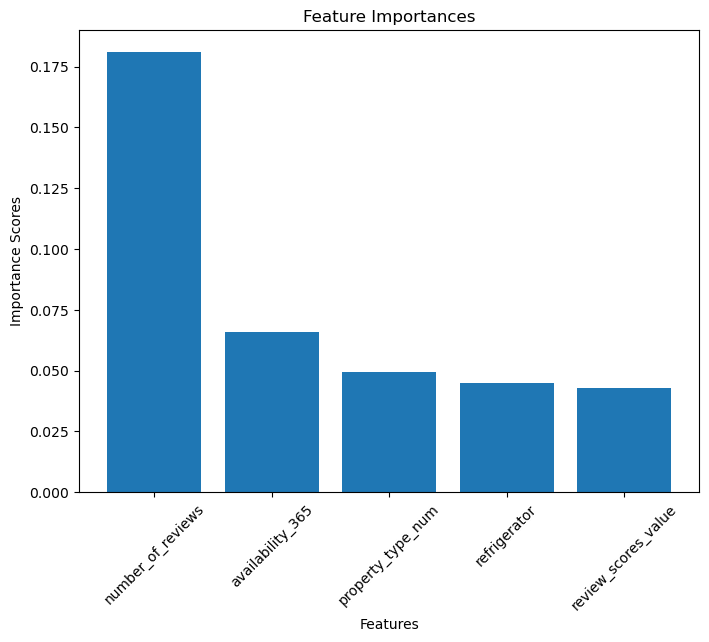

In [305]:
X_train, X_test, y_train, y_test = train_test_split(
quality_df.drop(columns=['price']), quality_df['price'], test_size=0.3, random_state=42)

# Create an instance of the RandomForestRegressor class
rf_reg = RandomForestRegressor(random_state=42)

# Train the model on the training set
rf_reg.fit(X_train, y_train)

# Get the feature importances
feature_importances = rf_reg.feature_importances_

# Print the feature importances
print("Feature importances:\n")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

# Select the top k features with the highest importance scores
k = 5
top_k_features = X_train.columns[np.argsort(feature_importances)[::-1][:k]]
print(f"\nTop {k} features: {list(top_k_features)}")


# Plot the feature importances for the top k features
plt.figure(figsize=(8, 6))
plt.bar(top_k_features, feature_importances[np.argsort(feature_importances)[::-1][:k]])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importances')
plt.show()

Linear Regression Model


In [306]:
quality_df.dropna(inplace=True)
# quality_df_x, quality_df_y = quality_df.iloc[:,:-1], quality_df.iloc[:,-1]
# quality_df_x = pd.DataFrame(quality_df_x, columns=quality_df.columns[:-1])

# quality_df.isnull().sum()

In [307]:
# ### Linear Regression ###

# def linear_reg(input_x, input_y, cv=5):
#     ## Defining parameters
#     model_LR= LinearRegression()

#     parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]}

#     ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

#     grid_search_LR = GridSearchCV(estimator=model_LR,  
#                          param_grid=parameters,
#                          scoring='neg_mean_squared_error',
#                          cv=cv,
#                          n_jobs=-1)

#     ## Lastly, finding the best parameters.

#     grid_search_LR.fit(input_x, input_y)
#     best_parameters_LR = grid_search_LR.best_params_  
#     best_score_LR = grid_search_LR.best_score_ 
#     print(best_parameters_LR)
#     print(best_score_LR)


# linear_reg(quality_df_x, quality_df_y)

In [308]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(quality_df.drop(columns=['price']), quality_df['price'], test_size=0.3, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 123196.54623519098
Root Mean Squared Error: 350.99365554834606
R-squared: -0.04991976243921559
